# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data['children'].value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

Находим отношение количества должников к общему числу заёмщиков в зависимости от количества детей

In [23]:
data.groupby('children')['debt'].mean()

children
0    0.075438
1    0.092346
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь у тебя абсолютно верное решение. Но покажу вариант для нашего случая ещё более короткое, фактически "однострочник". 
    
Суть его основана вот на чём: если у нас есть бинарная переменная, здесь это debt, которая принимает знчение 1-должник, 0-не должник, то sum по debt будет является количеством должников в группе, а count по debt (ты вместо count по группе используешь value_counts(), что есть аналог в этой задаче) - общим количеством заемщиков в этой группе. Как узнать % должников? Очевидно, что разделить sum на count. Но смотри, отношение sum к count (это из школьной математики следует) есть ..... среднее, то есть mean, поэтому наш "однострочник" выглядит так:
    
    data.groupby('children')['debt'].mean()
</div>

**Вывод:** Кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети. Видимо, наличие ребенка накладывает на клиента дополнительные финансовое бремя (обязательства) и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности в срок оплачивать обязательства. Однако выборка несбалансирована, небольшое число клиентов, имеющих трёх и более детей, не позволяет сделать вывод по данным категориям

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, конечно «разбег» между "цифрами" в наших данных мал. Возможно, что в рамках имеющихся данных сделать вывод о том, что семьи с детьми относительно семей без оных имеют какие-то задержки в выплатах кредитов нельзя. Слишком уж близки доли, чуть измениться выборка и значения могут измениться в другую сторону. То есть можно сделать вывод, что сколь угодно значимой разницы между группами нет. 

Но если считать, что **любая** разница между группами есть повод для «разделения» классов, то я бы сделал такой вывод: кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети. Видимо, наличие ребенка накладывает на клиента дополнительные финансовое бремя (обязательства) и клиенты либо менее ответственно относятся к своим кредитным обязательствам, либо не имеют возможности в срок оплачивать обязательства.

Отметь тот момент, что по некоторым группам заемщиков у нас недостаточно данных. Говорят, что выборка не сбалансирована, классы в выборке имеют разные размеры.</div>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Находим отношение количества должников к общему числу заемщиков в зависимости от семейного положения

In [24]:
data['family_status'].value_counts()

женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

In [25]:
data.groupby('family_status')['debt'].mean()
# Ваш код будет здесь. Вы можете создавать новые ячейки.

family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64

**Вывод:** Холостые клиенты чаще всего попадают в категорию неплательщиков, почти в 10% случаев; самые добросовестные клиенты - женаты/замужем (долги по платежам в 7,5% случаев). Разведенные и вдовцы/вдовы по статистике также реже просрочивают платёж (около 7% случаев), однако их количество в выборке невелико, что не позволяет сделать однозначный вывод. Кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

С теми же оговорками (... если считать, что любая разница между группами есть повод для «разделения» классов ...): кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке. Согласно данным такие клиенты менее ответственные. Получается, что узаконенные отношения ведут к более ответственному отношению к своим обязательствам. Ну вроде как совпадает со здравым смыслом - семейные люди более скрупулёзно берегут свой семейное спокойствие и несут за него ответственность.

А на самом деле, да, я с твоим выводом согласен.

p.s. ниже, для последних 2-х ответов на вопрос я напишу свой вывод (как пример), как будто бы "разбег" между цифрами давал основание делать значимый вывод о различиях.
</div>


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Находим отношение количества должников к общему числу заемщиков в зависимости от уровня дохода

In [26]:
data['total_income_category'].value_counts()

C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

In [27]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data.groupby('total_income_category')['debt'].mean()

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64

**Вывод:** Выборка по заемщикам, как с наименьшим доходом, так и с наибольшим крайне недостаточна для формирования однозначных выводов. 
Данный достаточно только для оценки платежеспособности категорий C и B, однако прямой зависимости возврата кредита от уровня ЗП не наблюдается.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

На мой взгляд - это самый сложный вопрос (для интерпретации результатов) в этом проекте. 

Посмотри на мой вывод, как дополнительный, альтернативный вариант твоему: исходя из здравого смысла логично предположить, что чаще всего должниками становятся люди с небольшим доходом, которым финансовые проблемы не позволяют вовремя осуществлять платежи. Но глядя на наши результаты лично мой вывод таков: выборка по заемщикам, как с наименьшим доходом, так и с наибольшим крайне недостаточна для формирования однозначных выводов. Можно думать, что E-категория самая низкооплачиваемая не может корректно распоряжаться деньгами и «влезает» в кредиты, но тогда неясно почему у А-категории также достаточно высокий процент задолженности. В общем вывод по группам А и Е неочевиден, мало данных.

Если же взять для анализа только группы В, С и D, то по полученным данным не наблюдаем зависимости "те, кто получает больше ЗП, лучше возвращает кредит». В целом это логично, так как материальный достаток - не единственная переменная, которая влияет на качество кредитной истории.
</div>


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Находим отношение количества должников к общему числу заемщиков в зависимости от цели кредита

In [28]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data.groupby('purpose_category')['debt'].mean()

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64

**Вывод:** Кредиты для операций с недвижимостью и на проведение свадеб возвращаются в срок чаще всего, 7,3% и 7,9% процентов неплательщиков соответственно. Кредиты на образование и операции с автомобилем просрочиваются приблизительно в 9,3% случаев.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Всё подтверждается и цифрами, и здравым смыслом. Машины люди покупают в кредит гораздо дорогие, нежели могут соответствовать им своим доходом (ну кому не хочется красивую иномарку). А вот рисковать ипотечным жильём люди не хотят. Интересно конечно, что с образованием не так - как правило такие кредиты берут люди мотивированные, имеющие цель впереди, да и суммы таких кредитов судя по рынку онлайн образования не так велики.
</div>


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Данные потеряны в одних и тех же строках по столбцам с общим количеством отработаных дней и доходам. Возможное причины появления этих пропусков - в нежелании людей делиться такой информацией как доход или в отсутствии дохода, как в категориях "пенсионер" или "безработный", отсюда возможны и аномальные значения трудодней. Также, возможная причина отсутствия значений - сбой при выгрузке данных на анализ или при объединении данных в единый файл.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично, молодец! Действительно, в наших данных пропуски в столбцах "трудовой стаж" и "ежемесячный доход" абсолютно идентичны. И первое, что приходит в случае, когда количество пропусков совпадает с точностью до единицы – некий сбой либо во время выгрузке данных на анализ, либо при объединении данных в единый файл, который также должен был передаваться на анализ, либо эти данные не собирались.
</div>


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* В выборке могут присутствовать очень большие  величины "перетягивающие" среднее арифметическое на свою сторону, медиана подобного недостатка лишина.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Да, в случае, если в данных наблюдаются "выбросы", то даже небольшое их количество может сильно "перетягивать" среднее значение в большую или меньшую сторону. Медиана зачастую даёт более правдивую картину. В общем случае, в реальных "живых" проектах я рекомендую в каждом случае смотреть на то, как распределены данные.
</div>


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Саша привет! Спасибо за рекомендацию ресурсов, а также за ревью и лестный отзыв о работе, подобный фидбэк приятно получать. 
    Отредактировал и дополнил свой общий вывод. К сожалению, пока не умею рисовать красивые графики, но всё впереди.</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Спасибо тебе Юрий за качественный, очень "чистенький" и аккуратный проект. Работать с твоим кодом и выводами мне было приятно!
    
По поводу графиков я порекомендую тебе начать с библиотеки seaborn. Seaborn сам по себе не очень сложная библиотека, вдобавок ещё и с хорошей документацией. А на странице с примерами визуализаций: https://seaborn.pydata.org/examples/index.html можно ткнуть в график и посмотреть на код, который подобную "картинку" генерирует. Ну и seaborn в отличии от matplotlib "менее многословный", что тоже плюс (хотя Матплотлиб и мощный очень, но код графика там легко может занимать 50-100 строк кода).    
</div>


### Шаг 4: общий вывод.

Было проведено исследование с целью определения факторов влияющих на платежеспособность клиентов. На входе была получена статистика платежеспособности клиентов.

Потенциальные факторы, оказывающие влияние на возврат кредита в срок:
- количество детей
- семейное положение
- уровень дохода
- цель кредитования

В результате были выявлены зависимости от вышеупомянутых факторов.

**Количество детей**
Выборка несбалансирована. Клиентов с тремя и более детьми в выборке недостаточно для формирования вывода, по данным категориям, однако картина в целом представляется так:
*Кредитополучатели без детей являются более ответственными, чем клиенты, у которых есть дети.*

**Семейное положение**
Прослеживается большая платежеспособность клиентов в категориях "женат / замужем", "в разводе" "вдовец / вдова". Напротив наименее платежеспособными являются клиенты с семейным положением "гражданский брак", "Не женат / не замужем". Однако, т.к. сборка несбалансирована, общий вывод не позволяет дать однозначные результаты по разведенным и вдовствующим. 
*Кредитополучатели, состоящие в официальном браке, являются более ответственными, чем холостые/незамужние клиенты*

**Уровень дохода**
Сборка несбалансирована, очень мало данных по клиентам с очень высоким и очень низким уровнем дохода не позволяет сделать выводы по данным категориям, однако общая картина следующая:
*Зависимости между уровнем дохода и платежеспособностью не прослеживается*

**Цель кредитования**
Судя по данным, цель кредитования влияет на возврат кредита в срок.
*Кредиты на операции с недвижимостью и проведение свадеб возвращают в срок чаще, нежели кредиты на операции с автомобилями и на получение образования*

**Общая рекомендация:** Для получения однозначных выводов по ряду вышеобозначенных вопросов необходимо дополнительное исследование на большем объеме данных.

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Ну даже и добавить-то собственно и нечего. Молодец, всё чётко, без воды и по делу. Спасибо за вывод, Юрий!
</div>


<div class="alert alert-danger">
<b>Комментарий 👉</b>

Финальный вывод конечно нужно более детальным сделать. Общий вывод - это изюминка твоей работы. Большинство заказчиков посмотрят сначала его (а некоторые только его). Чтобы выводы не огорошивали заказчика своей очевидностью, стоит добавить в них цифр, выводов, коэффициентов корреляций, графиков. Сделай так, чтобы вся найденная в данных информация была отражена в выводе.
    
Твои, как аналитика, выводы - это данные ("алмаз"), которые родились из большого объёма неструктурированной, зачастую, казалось бы, несвязанной между собой информации ("горной породы"). 

Для "не специалиста", поверь, выводы, которые ты делаешь будут казаться чем-то сродни волшебства. Эти люди "не специалисты" не будут понимать, НУ КАК ВОТ из наших табличек с кредитами можно было достать выводы, для того, чтобы спрогнозировать возврат/невозврат кредита. 

Но то, что они не понимают всего процесса - это не их беда. Просто они работают по-другому и мыслят другими категориями. Под "этими людьми" я здесь имею в виду топ-менеджеров, генеральных директоров и может быть ещё более высокий уровень. Их уровень понимания - это красивая и понятная им презентация в PowerPoint, с графиками бизнес показателей, с цифрами. Презентация из 3-5-10 слайдов это твоя, как аналитика "лебединая песня", те "алмазы", которые получены и облечены в ту форму, которая позволит лицам, принимающим решения принять такие зачастую многомилионной стоимости решения, которые напрямую повлияют на тот бизнес в котором ты работаешь.
Возможный пример вывода - в виде скрина:

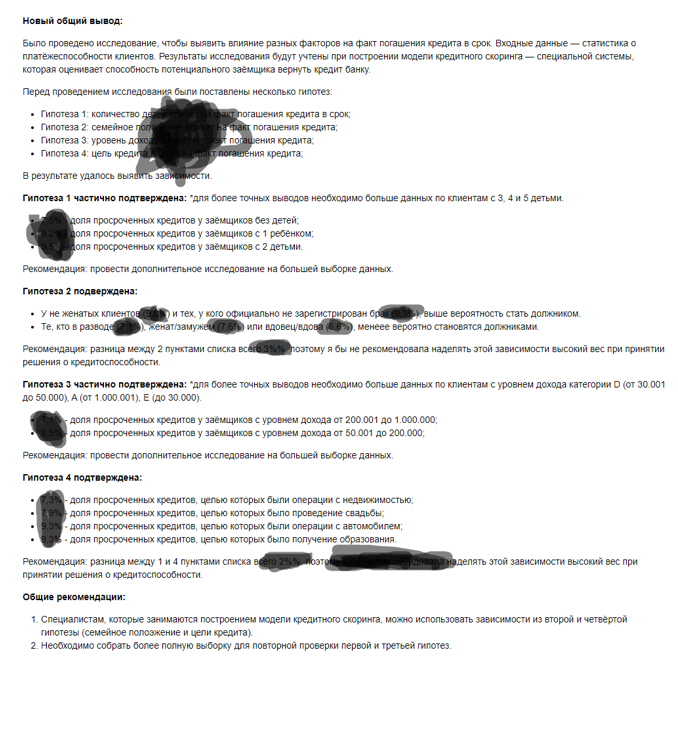</div>

# Результат ревью:

Я отмечаю высокий уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python и библиотеки pandas. Использование механизмов группировки данных (groupby - твой вариант) и создания сводных таблиц (pivot_table - он тоже в этом проекте возможен) является рекомендуемым и обязательным в работе любого аналитика данных и любого проекта. Ты показываешь владение этим инструментом.

Для экспертного совершенствования в использовании groupby, понимании расширенных концептов использования pivot_table, crosstab и далее я очень рекомендую тебе обратить внимание на следующий ресурс: https://dfedorov.spb.ru/pandas/. Рекомендуемые темы/уроки для освоения тем выше - на скрине ниже.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей.
 
Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

И всего один момент, который не позволяет мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

Финальный вывод в таком виде - это не то, что заказчик ждет от аналитика данных. Профессионал обязан предоставить точные, четкие и корректные **прогнозы и рекомендации**, которые помогут твоей компании в реализации скорингового алгоритма. Здесь, в финальном выводе требуется максимально подробно и с цифрами описать все те инсайды в данных, которые были обнаружены в ходе выполнения проекта.</div>

Этот момент требует твоего внимания. Комментарий помечен красным цветом. 

Подводя итог: отличная работа на самом-то деле, молодец! Уверен, что исправление вывода не вызовет у тебя сложностей. Жду доработанную версию проекта на повторное ревью.

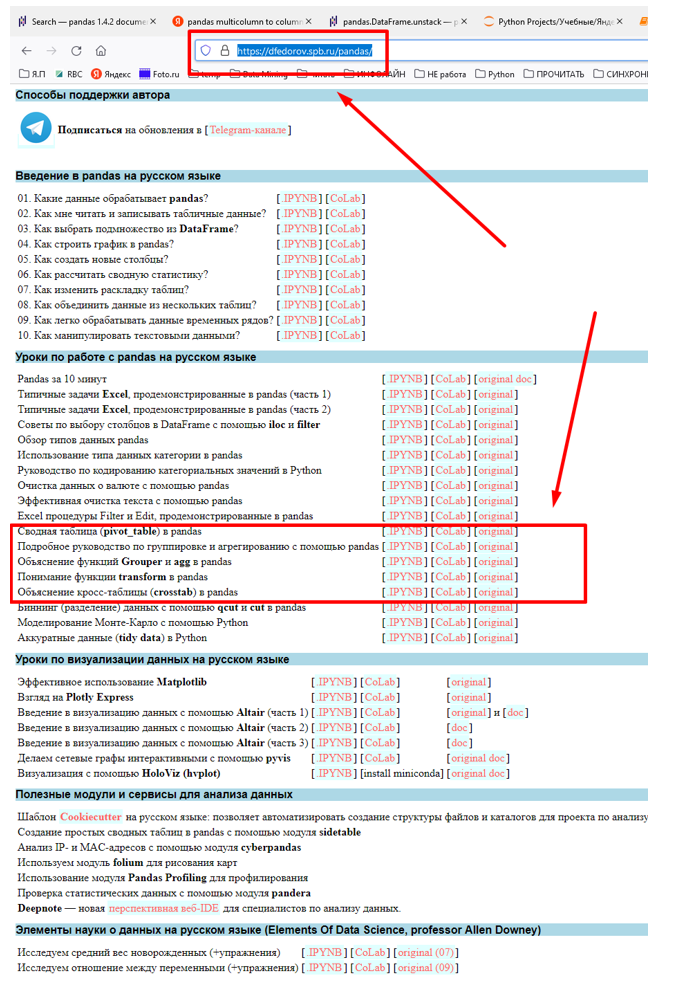